# Ensemble Methods, Bagging and Random Forests

## 1. Ensemble Methods and Bagging

These models will greatly improve our accuracy for **stratified data** in which predictor variables rarely have a linear or log-linear or polynomial relationship with our target variable.

- Ensemble-Based Methods are based on combining models.


- Bagging means Bootstrap Aggregation


We can combine predictions to reducte variance of decision trees:

<div>
    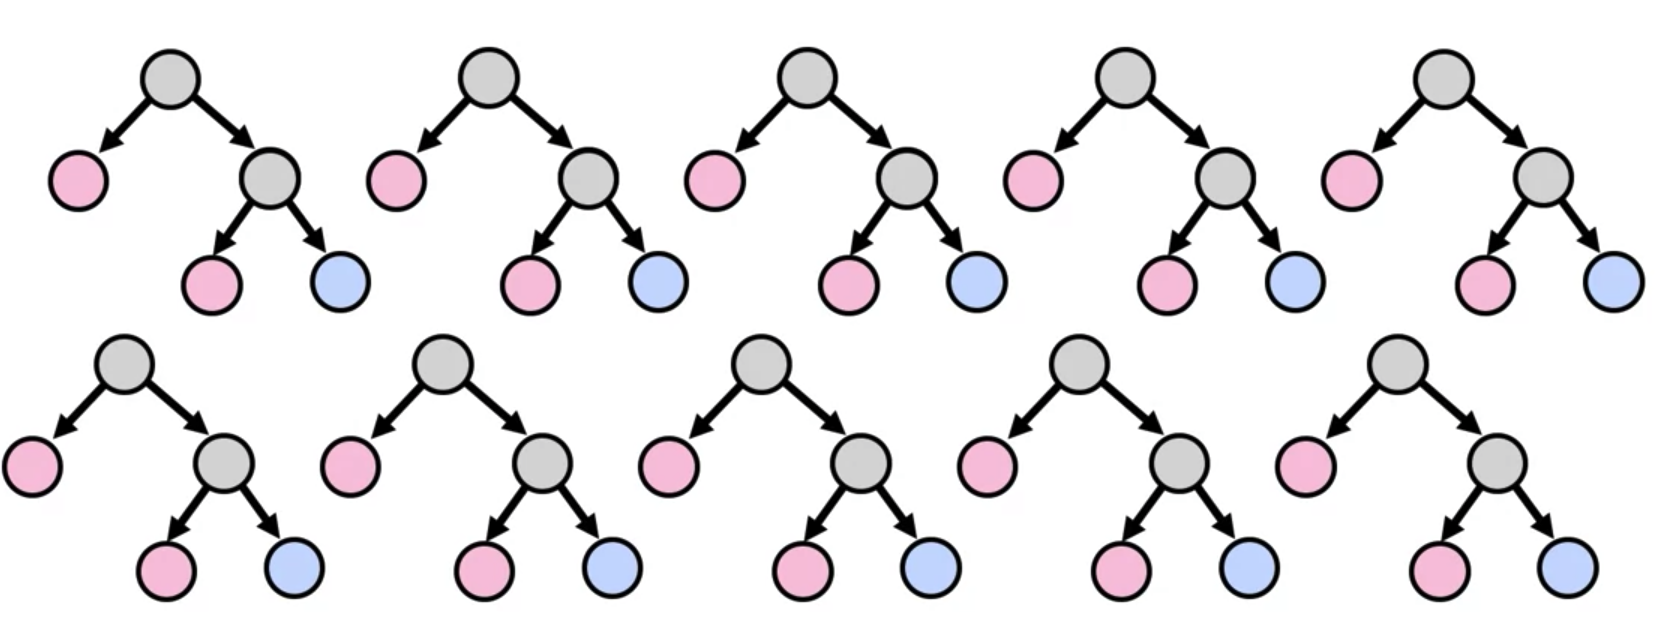
<div />

## Aggregating Results

The way we leverage all these different decision trees based off of these bootstrapped samples is by **giving each tree a vote for that final decision**.

We boostrap by getting each one of our smaller samples, build our decision trees, followed by a way of bringing together all of those different decision trees on those samples (aggregating samples)

<div>
    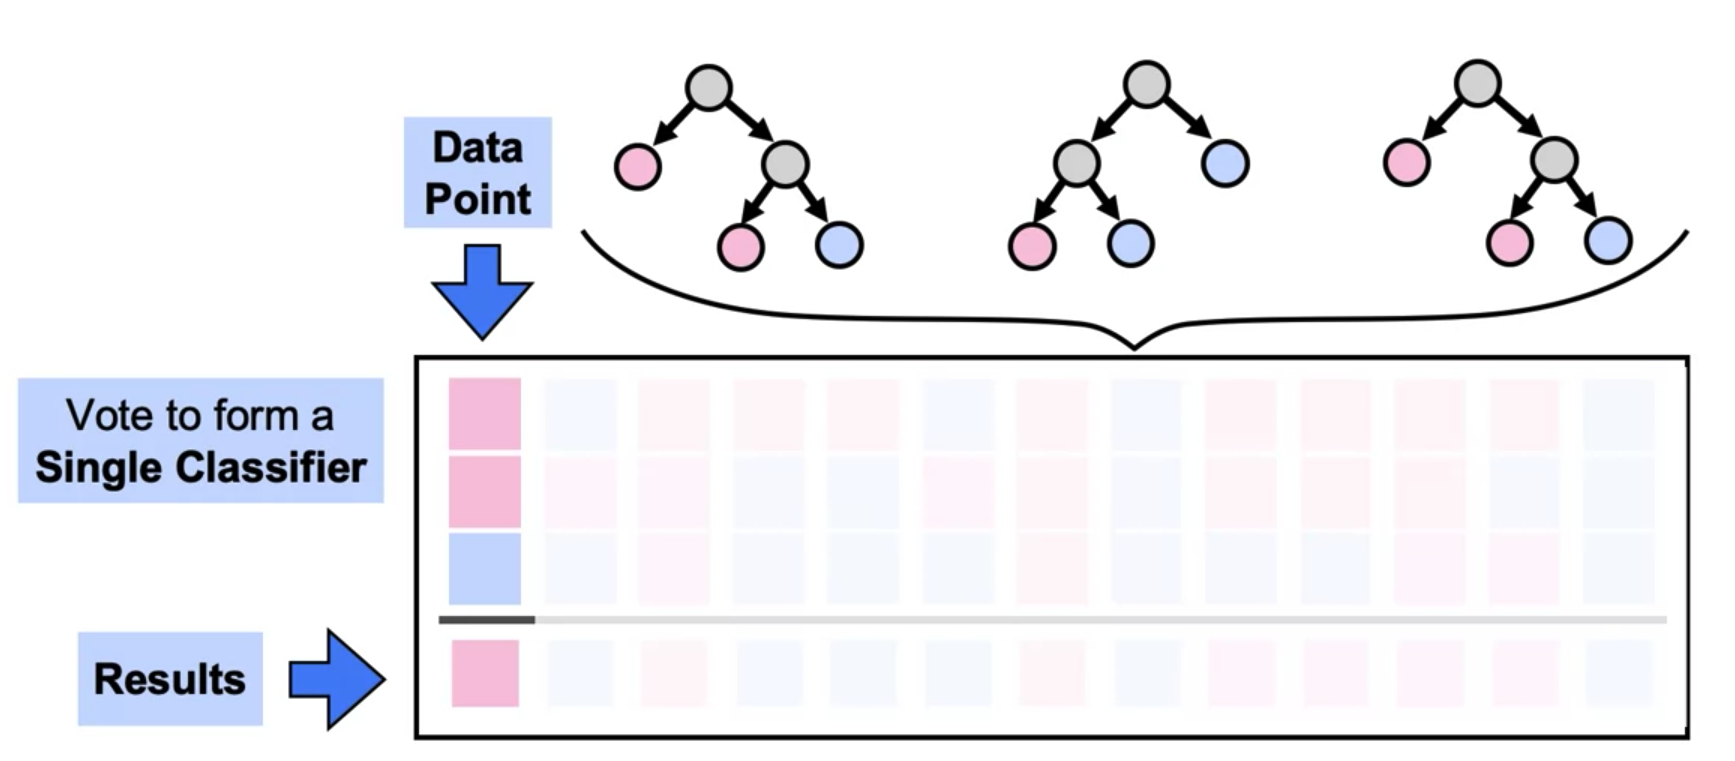
<div />

We start off with three different trees and use them to vote on a **Single Classifier:**

- Run through the decisions given the fit of each tree **for a specific row within our data set**


- For that specific row we can come up this the **Majority Class** that predicted results


- Do this across all of our different rows (take every single one of the different rows and see what the majority class is) and getting this majority class will be called **Metaclassification** 


- **Meta Classification:** uses several classifiers in order to take their outputs and decide on the class by combining. or aggregating or voting on which one is the majority class.

### Determining the Number of Trees

Bagging performance improvements increase with more trees, but how many trees do we fit?

- The **Bigger** the number of trees, the **Less Overfit** our decision trees

Usually around 50 we reach maximum improvement

<div>
    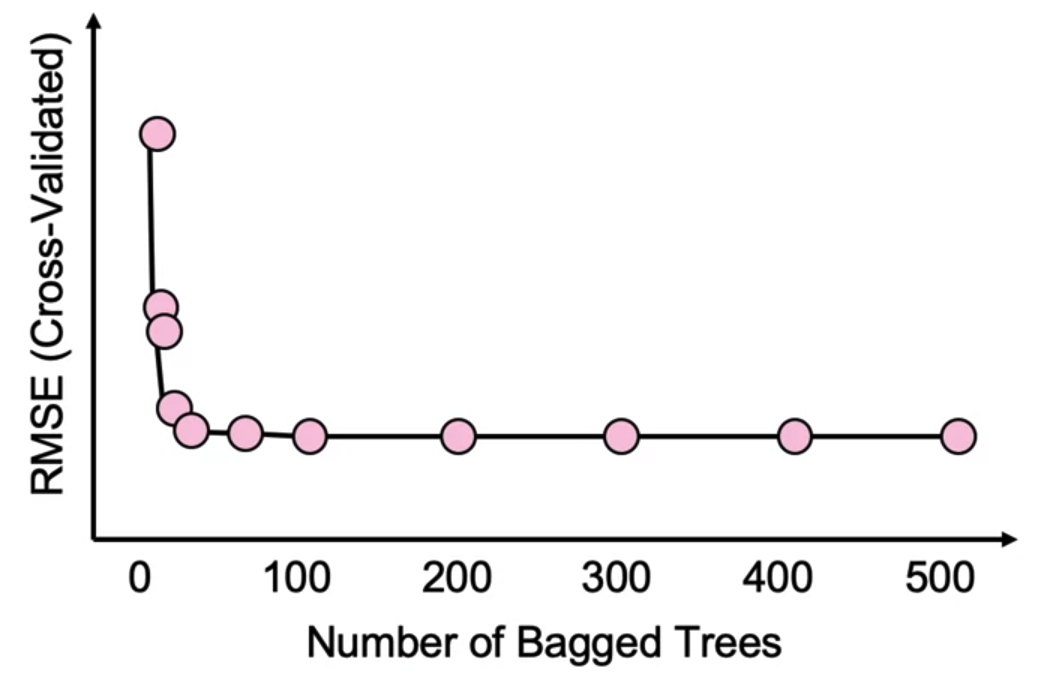
<div />

### Bagging Error Calculations

#### Features Similar to Decision Trees

- Easy to interpret and implement


- Heterogeneous input data allowed and no preprocessing is required

#### Features Specific to Bagging

- Less variability than decision trees (reducing chances of overfitting)


- Can grow trees in parallel (each tree is not dependent on others)

### Python Syntax

```python
# Import the class containing the classification method
from sklearn.ensemble import BaggingClassifier

# Create an instance of the class
BC = BaggingClassifier(n_estimators=50)

# Fit the instance on the data and then predict the expected value
BC = BC.fit(X_train, y_train)
y_predict = BC.predict(X_test)

```

Tune parameters with cross-validation.

Use `BaggingRegressor` for regressions

# 2. Random Forests

We can **reduce the variance due to bagging**.

For $n$ independent trees, each with variance $\sigma^2$, the **Bagged Variance** is:

$$\text{Bagged Variance} = \frac{\sigma^2}{n}$$

So in theory, the more trees we have the more we could reduce our variance

In reality, however, **Bootstrap Samples are Correlated:**

$$ \text{Bootstrap Samples Correlation} = \rho \sigma^2 + \frac{1-\rho}{n}\sigma^2 $$

Since we are sampling with replacement, they are likely highly correlated (the trees)

- If $\rho = 1$ there is no reduction in variance (i.e. if we use the same trees over and over again)

### Solution - Use Random Forest Algorithm

We need to introduce more randomness in order to further de-correlate trees

To achieve this we **restrict the number of features the trees are allowed to be built from**, i.e. use a random subset of features for each tree:

Each tree will then be built out of a random subset of rows and columns:

- **For Classification:** we will limit that subset of columns to $\sqrt{m}$ of the total features available


- **For Regression:** we limit it to $\frac{m}{3}$ (one-third) of the total number of features available


This will force different decisions for each tree depending on which one of the features are now still availale for that tree, for that subset.

### Python Syntax

```python
# Import the class containing the classification method
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the class
RC = RandomForestClassifier(n_estimators=50)

# Fit the instance on the data and then predict the expected value
RC = RC.fit(X_train, y_train)
y_predict = RC.predict(X_test)

```

Tune parameters with cross-validation.

Use `RandomForestRegressor` for regressions

## Extra Randoom Trees

Sometimes additional randomness is desired beyond Random Forest, i.e. when the algorithm does not reduce the variance enough (Random Forests are overfit)

- Can select features randomly and create splits randomly and not choose greedy algorithms

### Python Syntax

```python
# Import the class containing the classification method
from sklearn.ensemble import ExtraTreesClassifier

# Create an instance of the class
EC = ExtraTreesClassifier(n_estimators=50)

# Fit the instance on the data and then predict the expected value
EC = EC.fit(X_train, y_train)
y_predict = EC.predict(X_test)

```

Tune parameters with cross-validation.

Use `ExtraTreesRegressor` for regressions

# Models in Practice

We will be using the customer churn data from the telecom industry that we used in the KNN Lab. Since we preprocessed the data there, we will import the preprocessed data, which is in a file called: 'churndata_processed.csv' 

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

## Setup

* The raw churndata has been setup as a variable 'churndata', and we have imported it above.


* We will rely on the data preprocessing from the KNN notebook, which is captured in the file 'churndata_processed.csv'


* First, import that file and examine its contents.


* Output summary statistics and check variable data types


* Using Seaborn, plot a heatmap of variable correlations


In [3]:
filepath = 'churndata_processed.csv'
data = pd.read_csv(filepath)

In [5]:
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.43,0.40,0.0,0.00,0.25,0.75,1.0
multiple,7043.0,0.42,0.49,0.0,0.00,0.00,1.00,1.0
gb_mon,7043.0,0.24,0.24,0.0,0.04,0.20,0.32,1.0
security,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
backup,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
protection,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
support,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
unlimited,7043.0,0.67,0.47,0.0,0.00,1.00,1.00,1.0
contract,7043.0,0.38,0.42,0.0,0.00,0.00,1.00,1.0
paperless,7043.0,0.59,0.49,0.0,0.00,1.00,1.00,1.0


In [6]:
data.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
payment_Credit Card            int64
payment_Mailed Check           int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
dtype: object

Check correlation

We see that churn data and satisfaction are negatively correlated

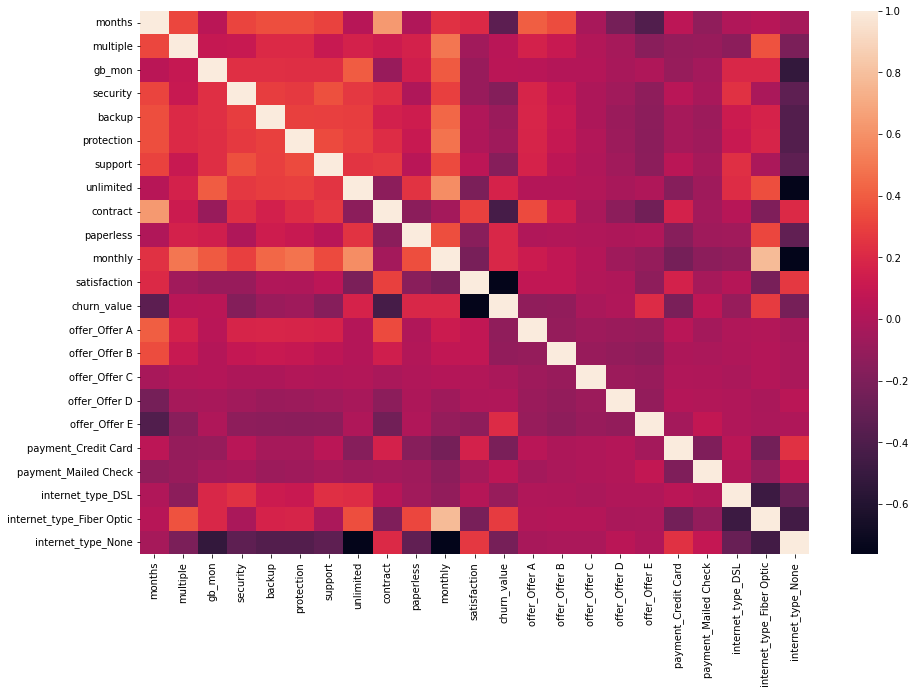

In [9]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data.corr())
plt.show()

## Examining the Target and Preprocessing

* Examine distribution of the predicted variable (`churn_value`).


* Split the data into train and test sets. Decide if a stratified split should be used or not based on the distribution. (if there is a skew)


* Examine the distribution of the predictor variable in the train and test data.

In [10]:
# Data are skewed at ~85% towards non-churned customers
target = 'churn_value'
data[target].value_counts()

# there is an imbalance

0    5174
1    1869
Name: churn_value, dtype: int64

In [11]:
data[target].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn_value, dtype: float64

Given the skew in the predictor variable, let's split the data with the *churned* values being stratified.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit


feature_cols = [x for x in data.columns if x != target]


# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1500, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data[target]))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, target]

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, target]

We have maintained that distributed (skew) within our training and testing sets

In [15]:
y_train.value_counts(normalize=True)

0    0.73462
1    0.26538
Name: churn_value, dtype: float64

In [16]:
y_test.value_counts(normalize=True)

0    0.734667
1    0.265333
Name: churn_value, dtype: float64

## Random Forest and Out-of-bag Error

* Fit random forest models with a range of tree numbers and evaluate the out-of-bag error for each of these models.


* Plot the resulting oob errors as a function of the number of trees.

*Note:* since the only thing changing is the number of trees, the `warm_start` flag can be used so that the model just adds more trees to the existing model each time. Use the `set_params` method to update the number of trees.

In [17]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.056107
20.0,0.052859
30.0,0.048349
40.0,0.049071
50.0,0.049432
100.0,0.046906
150.0,0.047447
200.0,0.048349
300.0,0.047988


The error looks like it has stabilized around 100-150 trees.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

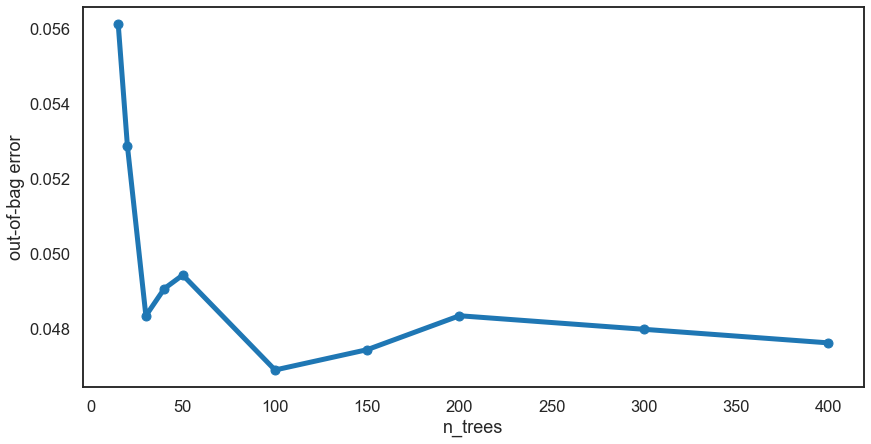

In [20]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

## Extra Trees

* Repeat the model using extra randomized trees (`ExtraTreesClassifier`). Note that the `bootstrap` parameter will have to be set to `True` for this model.


* Compare the out-of-bag errors for the two different types of models.

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.065127
20.0,0.061339
30.0,0.060076
40.0,0.056648
50.0,0.053401
100.0,0.051236
150.0,0.049973
200.0,0.051416
300.0,0.049793


Combine the two dataframes into a single one for easier plotting.

In [22]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.056107,0.065127
20.0,0.052859,0.061339
30.0,0.048349,0.060076
40.0,0.049071,0.056648
50.0,0.049432,0.053401
100.0,0.046906,0.051236
150.0,0.047447,0.049973
200.0,0.048349,0.051416
300.0,0.047988,0.049793


The random forest model performs consistently better than the extra randomized trees.

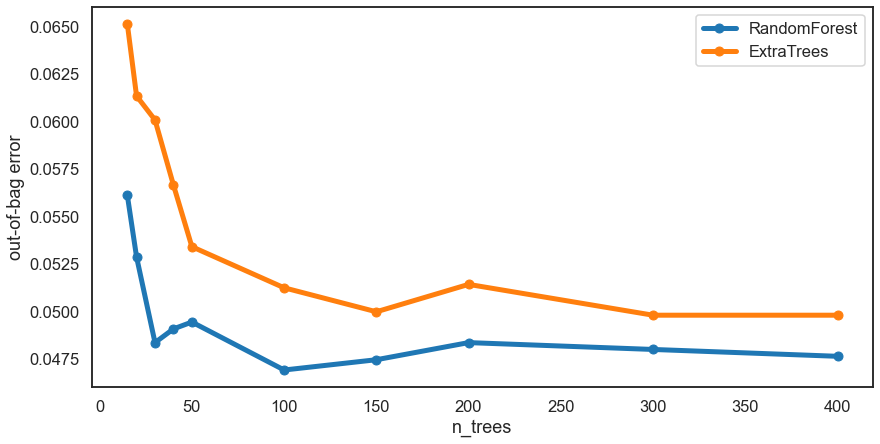

In [23]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

## Gathering Results


* Select one of the models that performs well and calculate error metrics and a confusion matrix on the test data set. 


* Given the distribution of the predicted class, which metric is most important? Which could be deceiving?

In [24]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

Unsurprisingly, recall is rather poor for the customers who churned (True) class since they are quite small. We are doing better than random guessing, though, as the accuracy is 0.96 (vs 0.85 for random guessing).

In [25]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1102
           1       0.94      0.83      0.88       398

    accuracy                           0.94      1500
   macro avg       0.94      0.91      0.92      1500
weighted avg       0.94      0.94      0.94      1500

   accuracy  precision    recall        f1       auc
0     0.942    0.94051  0.834171  0.884154  0.907557


## Examining Results

* Print or visualize the confusion matrix.


* Plot the ROC-AUC and precision-recall curves.


* Plot the feature importances.

Text(0.5, 76.5, 'Ground Truth')

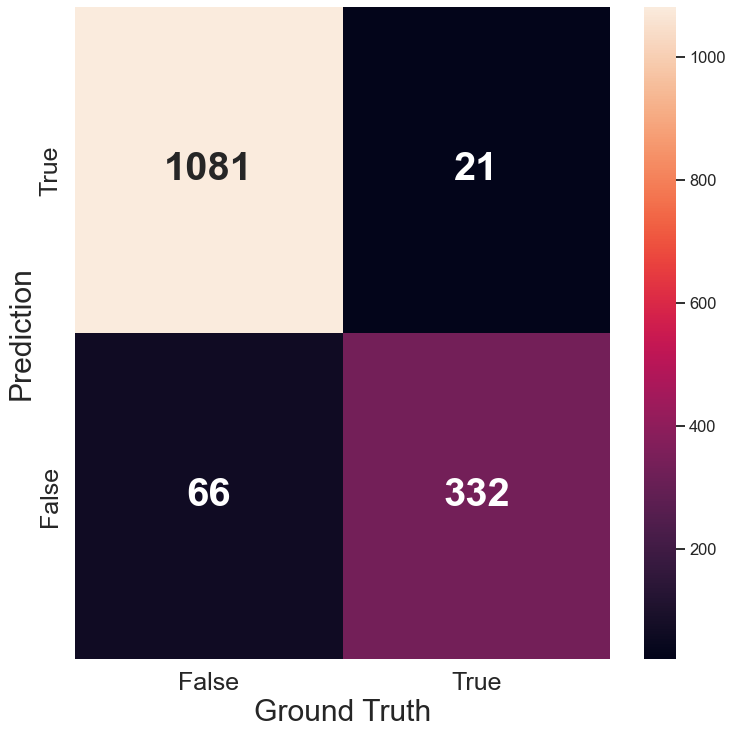

In [26]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

The ROC-AUC and precision-recall curves.

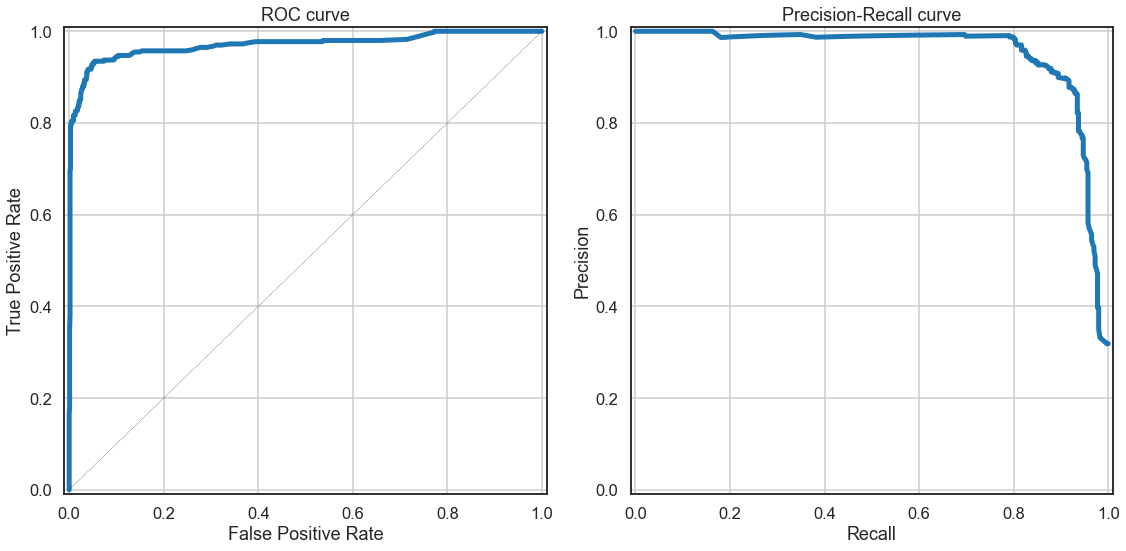

In [29]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)

# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

The feature importances. Total daily cost is the biggest predictor of customer churn.

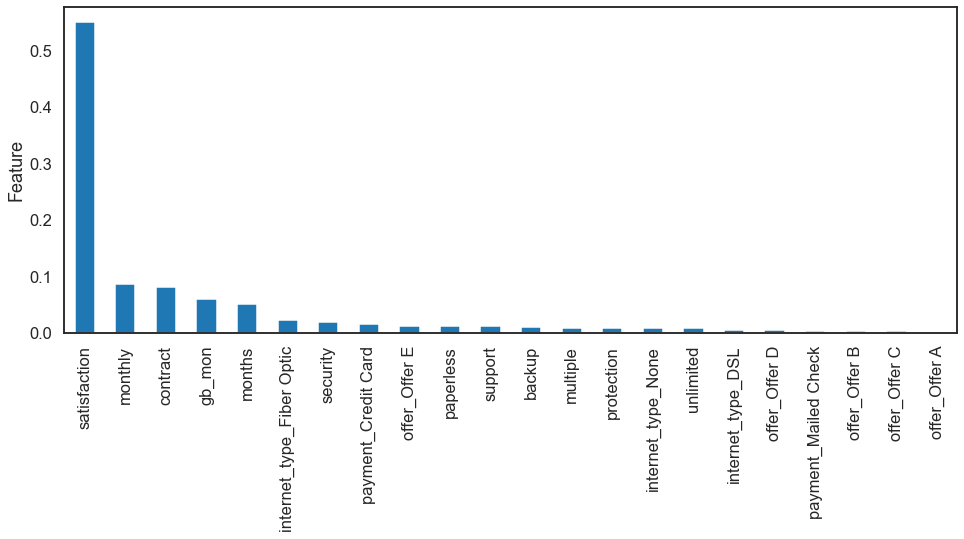

In [30]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');